In [1]:
import pyaerocom as pya
import pyaerocom.io.read_emep
pya.__version__

'0.9.0.dev4'

## EMEP Aas

In [2]:
# Setup EMEP reader
filepath = './EMEPglob_rv4_33-81_2010_month.nc'
reader_emep = pya.io.read_emep.ReadEMEP(filepath, data_id='EMEP')

# Setup Aas reader
aaspath = '/home/4e6c3172-2d17e2-2d4fda-2d84d3-2d9d67c79f3b81/shared-ns1000k/inputs/pyaerocom-testdata/obsdata/GAWTADSulphurSubset/data'
pya.const.add_ungridded_obs('aasetal', aaspath, reader=pya.io.ReadAasEtal)
pya.browse_database('Aas*')
reader_aas = pya.io.ReadUngridded('aasetal')


Dataset name: aasetal
Data directory: /home/4e6c3172-2d17e2-2d4fda-2d84d3-2d9d67c79f3b81/shared-ns1000k/inputs/pyaerocom-testdata/obsdata/GAWTADSulphurSubset/data
Supported variables: ['concso2', 'concso4', 'pr', 'wetso4', 'concso4pr']
Last revision: 20190522


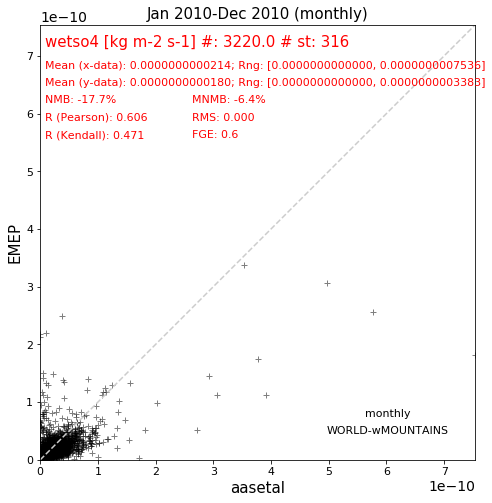

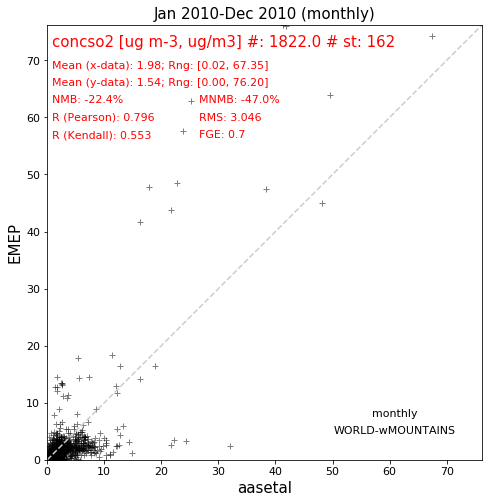

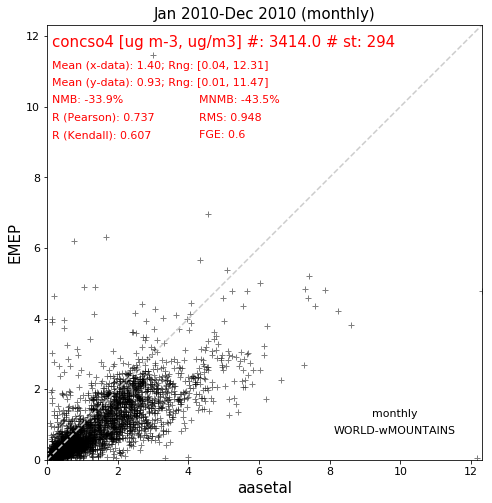

In [3]:
# Loop through and read variables, colocate and plot
for var in ['wetso4', 'concso2', 'concso4']:
    emep = reader_emep.read_var(var, ts_type='monthly')
    aas = reader_aas.read(vars_to_retrieve=var)
    coloc = pya.colocation.colocate_gridded_ungridded(emep, aas, filter_name="WORLD-wMOUNTAINS", harmonise_units=False)
    coloc.plot_scatter()
#     coloc.apply_latlon_filter(region_id='ASIA').plot_scatter()
#     coloc.apply_latlon_filter(region_id='EUROPE').plot_scatter()

## emep aeronet

In [8]:
# reader = pya.io.read_emep.ReadEMEP(filepath)
# od550aer = reader.read_var(var_name='od550aer', ts_type='monthly')
# od550aer.var_name = 'od550aer'
# od550aer.units = '1'

In [9]:
# reader = pya.io.ReadUngridded('AeronetSunV3Lev2.daily')
# aero = reader.read(vars_to_retrieve='od550aer')

In [10]:
# coloc = pya.colocation.colocate_gridded_ungridded(od550aer, aero, ts_type='monthly', start=2010)

In [14]:
# coloc.apply_latlon_filter(region_id='EUROPE').plot_scatter()

In [15]:
# coloc.apply_latlon_filter(region_id='ASIA').plot_scatter()